<a href="https://colab.research.google.com/github/mrmohit-cpu/AITA-ASSN7/blob/main/Experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

# Define dataset directories
train_dir = "/mnt/data/diabetic_retinopathy_dataset/train/images"
valid_dir = "/mnt/data/diabetic_retinopathy_dataset/valid/images"
test_dir = "/mnt/data/diabetic_retinopathy_dataset/test/images"

# Parameters
IMG_SIZE = (224, 224)  # Image dimensions for resizing
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path, label):
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG images
    image = tf.image.resize(image, IMG_SIZE)  # Resize to desired size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Function to load dataset
def load_dataset(directory):
    # Get list of image paths and labels from subdirectories
    class_names = sorted(os.listdir(directory))
    class_indices = {name: idx for idx, name in enumerate(class_names)}

    image_paths = []
    labels = []

    for class_name, idx in class_indices.items():
        class_dir = os.path.join(directory, class_name)
        for file_name in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, file_name))
            labels.append(idx)

    # Create a TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image).shuffle(len(image_paths)).batch(BATCH_SIZE)
    return dataset, class_names

# Load train, validation, and test datasets
train_dataset, class_names = load_dataset(train_dir)
valid_dataset, _ = load_dataset(valid_dir)
test_dataset, _ = load_dataset(test_dir)

print(f"Classes: {class_names}")
print("Datasets loaded successfully.")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/diabetic_retinopathy_dataset/train/images'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
import tensorflow as tf
import os

# Mount Google Drive
drive.mount('/content/drive')

# Dataset paths
train_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train/images"
valid_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/valid/images"
test_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test/images"

# Parameters
IMG_SIZE = (224, 224)  # Image dimensions for resizing
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path, label):
    # Load the image
    image = tf.io.read_file(image_path)  # Read the image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG images
    image = tf.image.resize(image, IMG_SIZE)  # Resize to desired size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Function to load dataset
def load_dataset(directory):
    # Get list of image paths and labels from subdirectories
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

    class_names = sorted(os.listdir(directory))
    if not class_names:
        raise ValueError(f"No class folders found in directory: {directory}")

    class_indices = {name: idx for idx, name in enumerate(class_names)}

    image_paths = []
    labels = []

    for class_name, idx in class_indices.items():
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue  # Skip non-directory files

        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image files
                image_paths.append(file_path)
                labels.append(idx)

    if not image_paths:
        raise ValueError(f"No valid image files found in directory: {directory}")

    # Convert paths and labels to TensorFlow tensors
    image_paths = tf.convert_to_tensor(image_paths, dtype=tf.string)  # Ensure image paths are strings
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)  # Ensure labels are integers

    # Create a TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image).shuffle(buffer_size=len(image_paths)).batch(BATCH_SIZE)
    return dataset, class_names

# Load train, validation, and test datasets
try:
    train_dataset, class_names = load_dataset(train_dir)
    valid_dataset, _ = load_dataset(valid_dir)
    test_dataset, _ = load_dataset(test_dir)

    print(f"Classes: {class_names}")
    print("Datasets loaded successfully.")
except (FileNotFoundError, ValueError) as e:
    print(f"Error: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: No valid image files found in directory: /content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train/images


In [3]:
def load_dataset(directory):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

    print(f"Checking directory: {directory}")

    class_names = sorted(os.listdir(directory))
    if not class_names:
        raise ValueError(f"No class folders found in directory: {directory}")

    print(f"Detected classes: {class_names}")

    class_indices = {name: idx for idx, name in enumerate(class_names)}

    image_paths = []
    labels = []

    for class_name, idx in class_indices.items():
        class_dir = os.path.join(directory, class_name)
        print(f"Processing class folder: {class_dir}")
        if not os.path.isdir(class_dir):
            continue  # Skip non-directory files

        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            print(f"Found file: {file_path}")
            if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image files
                image_paths.append(file_path)
                labels.append(idx)

    if not image_paths:
        raise ValueError(f"No valid image files found in directory: {directory}")

    # Convert paths and labels to TensorFlow tensors
    image_paths = tf.convert_to_tensor(image_paths, dtype=tf.string)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Create a TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image).shuffle(buffer_size=len(image_paths)).batch(BATCH_SIZE)
    return dataset, class_names


In [9]:
from google.colab import drive
import tensorflow as tf
import os

# Mount Google Drive
drive.mount('/content/drive')

# Dataset paths
train_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train/images"
valid_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/valid/images"
test_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test/images"

# Parameters
IMG_SIZE = (224, 224)  # Image dimensions for resizing
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)  # Read the image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG images
    image = tf.image.resize(image, IMG_SIZE)  # Resize to desired size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Function to load dataset
def load_dataset(directory):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

    class_names = sorted(os.listdir(directory))
    if not class_names:
        raise ValueError(f"No class folders found in directory: {directory}")

    class_indices = {name: idx for idx, name in enumerate(class_names)}

    image_paths = []
    labels = []

    for class_name, idx in class_indices.items():
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue  # Skip non-directory files

        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image files
                image_paths.append(file_path)
                labels.append(idx)

    if not image_paths:
        raise ValueError(f"No valid image files found in directory: {directory}")

    # Convert paths and labels to TensorFlow tensors
    image_paths = tf.convert_to_tensor(image_paths, dtype=tf.string)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Create a TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image).shuffle(buffer_size=len(image_paths)).batch(BATCH_SIZE)
    return dataset, class_names

# Load train, validation, and test datasets
train_dataset, class_names = load_dataset(train_dir)
valid_dataset, _ = load_dataset(valid_dir)
test_dataset, _ = load_dataset(test_dir)

# Build the model
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Use the length of class_names
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: No valid image files found in directory: /content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train/images

In [4]:
def load_dataset(directory):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

    print(f"Checking directory: {directory}")

    class_names = sorted(os.listdir(directory))
    if not class_names:
        raise ValueError(f"No class folders found in directory: {directory}")

    print(f"Detected classes: {class_names}")

    class_indices = {name: idx for idx, name in enumerate(class_names)}

    image_paths = []
    labels = []

    for class_name, idx in class_indices.items():
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue  # Skip non-directory files

        print(f"Processing class folder: {class_dir}")
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            print(f"Found file: {file_path}")
            if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image files
                image_paths.append(file_path)
                labels.append(idx)

    if not image_paths:
        raise ValueError(f"No valid image files found in directory: {directory}")

    # Convert paths and labels to TensorFlow tensors
    image_paths = tf.convert_to_tensor(image_paths, dtype=tf.string)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    # Create a TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image).shuffle(buffer_size=len(image_paths)).batch(BATCH_SIZE)
    return dataset, class_names

In [12]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf

# Model Building
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Use the length of class_names
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Now that the model is defined, you can proceed to training:
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10
)

NameError: name 'class_names' is not defined

In [5]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Set directory paths (update these paths to your Google Drive dataset paths)
train_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train"
valid_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/valid"
test_dir = "/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test"

# Check if dataset directories exist
for directory in [train_dir, valid_dir, test_dir]:
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

# Function to load dataset using image_dataset_from_directory
def load_dataset(directory):
    # Load dataset from directory
    try:
        dataset = image_dataset_from_directory(
            directory,
            image_size=IMG_SIZE,
            batch_size=BATCH_SIZE,
            label_mode='int',  # Use 'int' for sparse categorical cross-entropy
            shuffle=True
        )
        return dataset
    except Exception as e:
        print(f"Error loading dataset from {directory}: {e}")
        raise

# Load train, validation, and test datasets
train_dataset = load_dataset(train_dir)
valid_dataset = load_dataset(valid_dir)
test_dataset = load_dataset(test_dir)

# Get class names from the dataset (assuming the class names are the subdirectories)
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

# Model building using EfficientNetB0 (transfer learning)
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'  # Load pre-trained weights from ImageNet
)
base_model.trainable = False  # Freeze the base model layers

# Define the full model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer based on number of classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary to verify architecture
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optionally, save the model after training
model.save('/content/drive/MyDrive/RetinopathyModel.h5')
print("Model saved to Google Drive.")

Found 145 files belonging to 2 classes.
Found 38 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Class names: ['images', 'labels']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 9s/step - accuracy: 1.0000 - loss: 0.2491 - val_accuracy: 1.0000 - val_loss: 0.0391
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 1.0000 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.2712e-04
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 1.0000 - loss: 9.5368e-04 - val_accuracy: 1.0000 - val_loss: 6.8062e-04
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 7.9645e-04 - val_accuracy: 1.00

Test Accuracy: 1.00
Model saved to Google Drive.


In [6]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 100  # Start fine-tuning from the 100th layer (you can experiment with this)

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False  # Freeze the earlier layers

# Re-compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training with the fine-tuned model
history_finetune = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=5  # Fine-tune for additional epochs
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 90s 10s/step - accuracy: 0.1029 - loss: 1.6570 - val_accuracy: 1.0000 - val_loss: 6.3176e-04
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.0952 - loss: 1.5980 - val_accuracy: 1.0000 - val_loss: 7.9309e-04
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.0895 - loss: 1.5276 - val_accuracy: 1.0000 - val_loss: 9.9788e-04
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.1441 - loss: 1.4520 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.1685 - loss: 1.3763 - val_accuracy: 1.0000 - val_loss: 0.0016


In [8]:
# Load a new image for prediction
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test/images/37_jpg.rf.eb385d0dc5261c7c8bf23375b6e39c89.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Class: images


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


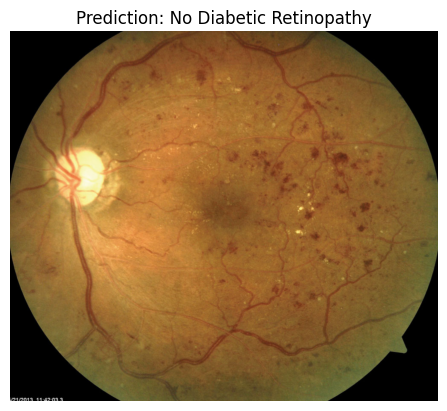

No Diabetic Retinopathy Detected


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load class names (ensure these are consistent with the training dataset)
class_names = ['No Diabetic Retinopathy', 'Diabetic Retinopathy']

# Preprocess the test image (resize, normalize, etc.)
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/RetinopathyModel.h5')  # Use your model path

# Function to make predictions and display results
def predict_and_display(image_path):
    img_array = preprocess_image(image_path)  # Preprocess image for model
    predictions = model.predict(img_array)  # Get model's prediction

    # Get predicted class (0: No Retinopathy, 1: Diabetic Retinopathy)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_names[predicted_class_index]  # Get the class name

    # Display the image and the prediction
    img = image.load_img(image_path)  # Load image for display
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {predicted_class_label}")
    plt.show()

    # Print prediction message
    if predicted_class_label == 'Diabetic Retinopathy':
        print("Diabetic Retinopathy Detected!")
    else:
        print("No Diabetic Retinopathy Detected")

# Test on a new image
img_path = '/content/drive/MyDrive/RetinopathyDataset/qtest.jpg'  # Replace with the path to your test image
predict_and_display(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


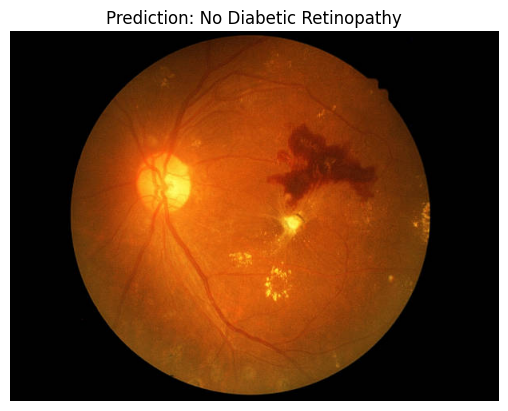

No Diabetic Retinopathy Detected


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load class names (ensure these are consistent with the training dataset)
class_names = ['No Diabetic Retinopathy', 'Diabetic Retinopathy']

# Preprocess the test image (resize, normalize, etc.)
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/RetinopathyModel.h5')  # Use your model path

# Function to make predictions and display results
def predict_and_display(image_path):
    img_array = preprocess_image(image_path)  # Preprocess image for model
    predictions = model.predict(img_array)  # Get model's prediction

    # Get predicted class (0: No Retinopathy, 1: Diabetic Retinopathy)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_names[predicted_class_index]  # Get the class name

    # Display the image and the prediction
    img = image.load_img(image_path)  # Load image for display
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {predicted_class_label}")
    plt.show()

    # Print prediction message
    if predicted_class_label == 'Diabetic Retinopathy':
        print("Diabetic Retinopathy Detected!")
    else:
        print("No Diabetic Retinopathy Detected")

# Test on a new image
img_path = '/content/drive/MyDrive/RetinopathyDataset/qtest1.jpg'  # Replace with the path to your test image
predict_and_display(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediction raw values: [[0.5444968  0.45550326]]


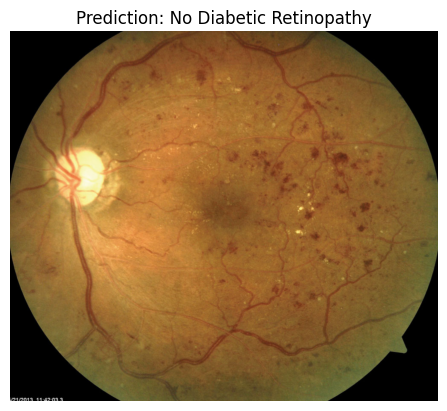

No Diabetic Retinopathy Detected


In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load class names (ensure these are consistent with the training dataset)
class_names = ['No Diabetic Retinopathy', 'Diabetic Retinopathy']

# Preprocess the test image (resize, normalize, etc.)
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/RetinopathyModel.h5')  # Use your model path

# Recompile the model to avoid the warning (if you're planning to evaluate it)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to make predictions and display results
def predict_and_display(image_path):
    img_array = preprocess_image(image_path)  # Preprocess image for model
    predictions = model.predict(img_array)  # Get model's prediction

    # Print prediction values to debug
    print("Prediction raw values:", predictions)

    # Get predicted class (0: No Retinopathy, 1: Diabetic Retinopathy)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_names[predicted_class_index]  # Get the class name

    # Display the image and the prediction
    img = image.load_img(image_path)  # Load image for display
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {predicted_class_label}")
    plt.show()

    # Print prediction message
    if predicted_class_label == 'Diabetic Retinopathy':
        print("Diabetic Retinopathy Detected!")
    else:
        print("No Diabetic Retinopathy Detected")

# Test on a new image
img_path = '/content/drive/MyDrive/RetinopathyDataset/qtest.jpg'  # Replace with the path to your test image
predict_and_display(img_path)

epochs=**10**

Found 145 files belonging to 2 classes.
Found 38 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0797 - val_accuracy: 1.0000 - val_loss: 5.9735e-05
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 1.0000 - loss: 3.6071e-05 - val_accuracy: 1.0000 - val_loss: 2.8861e-06
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 1.0000 - loss: 2.1164e-06 - val_accuracy: 1.0000 - val_loss: 5.6781e-07
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 1.0000 - loss: 4.5528e-07 - val_accuracy: 1.0000 - val_loss: 2.2273e-07
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 1.0000 - loss: 1.8264e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 1.0000 - loss: 1.1866e-07 - val_accuracy: 1.0000 - val_loss: 1.0666e-07
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 1.0000 - loss: 1.1097e

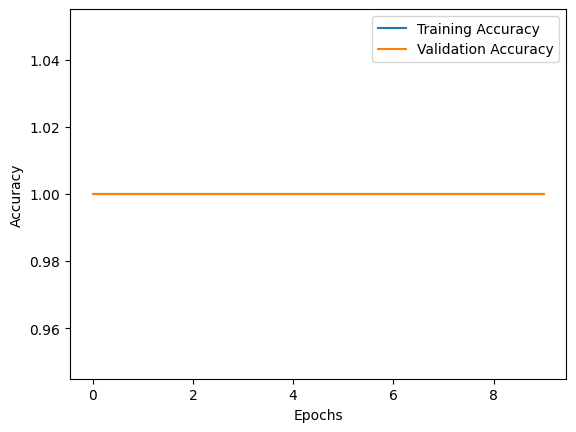

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


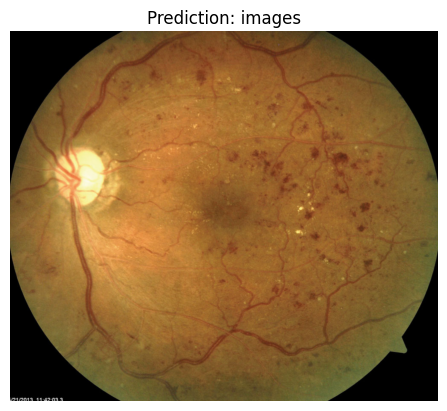

No Diabetic Retinopathy Detected


In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models

# Define the paths to the dataset
train_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train'
valid_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/valid'
test_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test'

# Load the datasets
def load_dataset(directory):
    dataset = image_dataset_from_directory(
        directory,
        image_size=(224, 224),  # Resizing the images to the required size
        batch_size=32,
        label_mode='int',  # Labels as integer indices
        shuffle=True,
    )
    return dataset, dataset.class_names

train_dataset, class_names = load_dataset(train_dir)
valid_dataset, _ = load_dataset(valid_dir)
test_dataset, _ = load_dataset(test_dir)

# Normalize the datasets
def normalize_data(dataset):
    return dataset.map(lambda x, y: (x / 255.0, y))

train_dataset = normalize_data(train_dataset)
valid_dataset = normalize_data(valid_dataset)
test_dataset = normalize_data(test_dataset)

# Build the model
def build_model():
    base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Build and train the model
model = build_model()
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Save the trained model
model.save('/content/drive/MyDrive/RetinopathyModel1.keras')

# Visualize training progress (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to make predictions and display results on new images
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Load the trained model (ensure this path is correct)
model = tf.keras.models.load_model('/content/drive/MyDrive/RetinopathyModel1.keras')

# Function to predict and display results
def predict_and_display(image_path):
    img_array = preprocess_image(image_path)  # Preprocess image for model
    predictions = model.predict(img_array)  # Get model's prediction

    # Get predicted class (0: No Retinopathy, 1: Diabetic Retinopathy)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_names[predicted_class_index]  # Get the class name

    # Display the image and the prediction
    img = image.load_img(image_path)  # Load image for display
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {predicted_class_label}")
    plt.show()

    # Print prediction message
    if predicted_class_label == 'Diabetic Retinopathy':
        print("Diabetic Retinopathy Detected!")
    else:
        print("No Diabetic Retinopathy Detected")

# Test on a new image (replace with the path to your test image)
img_path = '/content/drive/MyDrive/RetinopathyDataset/qtest.jpg'  # Replace with the path to your test image
predict_and_display(img_path)


epochs=**75**

Found 145 files belonging to 2 classes.
Found 38 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Epoch 1/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5792 - loss: 0.4967 - val_accuracy: 1.0000 - val_loss: 1.8687e-04
Epoch 2/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 1.0000 - loss: 1.0885e-04 - val_accuracy: 1.0000 - val_loss: 5.6969e-06
Epoch 3/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 4.0326e-06 - val_accuracy: 1.0000 - val_loss: 9.0348e-07
Epoch 4/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 1.0000 - loss: 7.3591e-07 - val_accuracy: 1.0000 - val_loss: 3.2939e-07
Epoch 5/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 2.8099e-07 - val_accuracy: 1.0000 - val_loss: 1.3803e-07
Epoch 6/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 1.3332e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 7/75
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 1.0000 - loss: 1.1921e

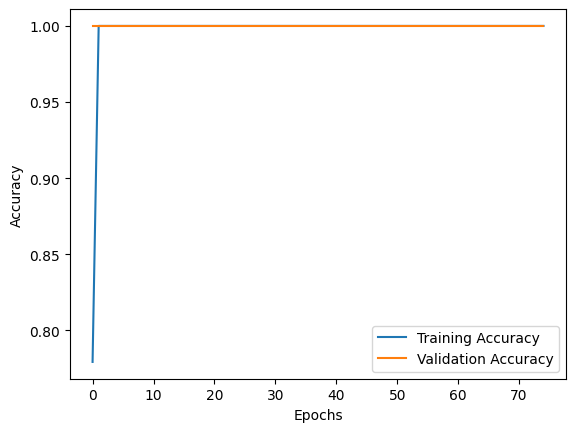

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


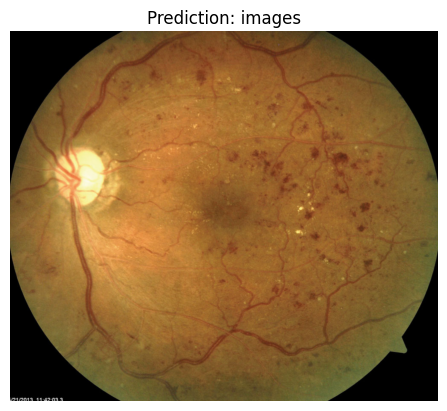

No Diabetic Retinopathy Detected


In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models

# Define the paths to the dataset
train_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train'
valid_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/valid'
test_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test'

# Load the datasets
def load_dataset(directory):
    dataset = image_dataset_from_directory(
        directory,
        image_size=(224, 224),  # Resizing the images to the required size
        batch_size=32,
        label_mode='int',  # Labels as integer indices
        shuffle=True,
    )
    return dataset, dataset.class_names

train_dataset, class_names = load_dataset(train_dir)
valid_dataset, _ = load_dataset(valid_dir)
test_dataset, _ = load_dataset(test_dir)

# Normalize the datasets
def normalize_data(dataset):
    return dataset.map(lambda x, y: (x / 255.0, y))

train_dataset = normalize_data(train_dataset)
valid_dataset = normalize_data(valid_dataset)
test_dataset = normalize_data(test_dataset)

# Build the model
def build_model():
    base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Build and train the model
model = build_model()
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=75
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Save the trained model
model.save('/content/drive/MyDrive/RetinopathyModel1.keras')

# Visualize training progress (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to make predictions and display results on new images
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Load the trained model (ensure this path is correct)
model = tf.keras.models.load_model('/content/drive/MyDrive/RetinopathyModel1.keras')

# Function to predict and display results
def predict_and_display(image_path):
    img_array = preprocess_image(image_path)  # Preprocess image for model
    predictions = model.predict(img_array)  # Get model's prediction

    # Get predicted class (0: No Retinopathy, 1: Diabetic Retinopathy)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_names[predicted_class_index]  # Get the class name

    # Display the image and the prediction
    img = image.load_img(image_path)  # Load image for display
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {predicted_class_label}")
    plt.show()

    # Print prediction message
    if predicted_class_label == 'Diabetic Retinopathy':
        print("Diabetic Retinopathy Detected!")
    else:
        print("No Diabetic Retinopathy Detected")

# Test on a new image (replace with the path to your test image)
img_path = '/content/drive/MyDrive/RetinopathyDataset/qtest.jpg'  # Replace with the path to your test image
predict_and_display(img_path)


epochs=**500**

Found 145 files belonging to 2 classes.
Found 38 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.2934 - val_accuracy: 1.0000 - val_loss: 1.7716e-04
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 1.0000 - loss: 1.0388e-04 - val_accuracy: 1.0000 - val_loss: 7.0772e-06
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 1.0000 - loss: 5.1497e-06 - val_accuracy: 1.0000 - val_loss: 1.2768e-06
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 1.0000 - loss: 1.0525e-06 - val_accuracy: 1.0000 - val_loss: 4.6429e-07
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 1.0000 - loss: 4.1899e-07 - val_accuracy: 1.0000 - val_loss: 2.3842e-07
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 1.0000 - loss: 2.3750e-07 - val_accuracy: 1.0000 - val_loss: 1.7254e-07
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 1.0000 - loss: 

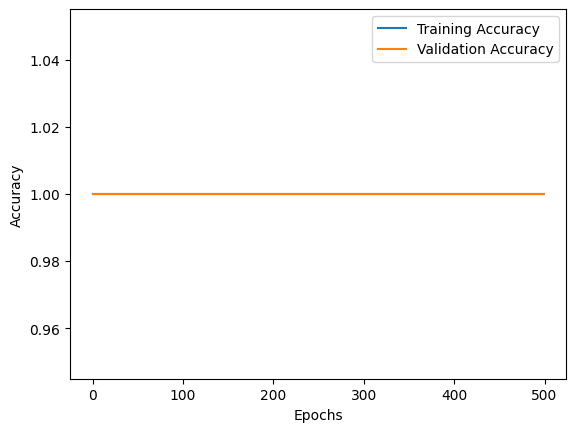

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


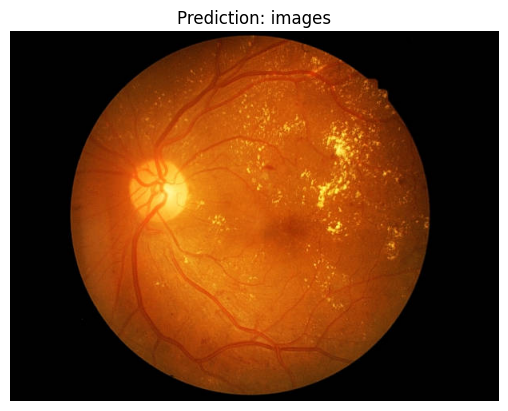

No Diabetic Retinopathy Detected


In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models

# Define the paths to the dataset
train_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/train'
valid_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/valid'
test_dir = '/content/drive/MyDrive/RetinopathyDataset/Diabetic Retinopathy.v1i.yolov8/test'

# Load the datasets
def load_dataset(directory):
    dataset = image_dataset_from_directory(
        directory,
        image_size=(224, 224),  # Resizing the images to the required size
        batch_size=32,
        label_mode='int',  # Labels as integer indices
        shuffle=True,
    )
    return dataset, dataset.class_names

train_dataset, class_names = load_dataset(train_dir)
valid_dataset, _ = load_dataset(valid_dir)
test_dataset, _ = load_dataset(test_dir)

# Normalize the datasets
def normalize_data(dataset):
    return dataset.map(lambda x, y: (x / 255.0, y))

train_dataset = normalize_data(train_dataset)
valid_dataset = normalize_data(valid_dataset)
test_dataset = normalize_data(test_dataset)

# Build the model
def build_model():
    base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Build and train the model
model = build_model()
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=500
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Save the trained model
model.save('/content/drive/MyDrive/RetinopathyModel1.keras')

# Visualize training progress (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to make predictions and display results on new images
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0,1]
    return img_array

# Load the trained model (ensure this path is correct)
model = tf.keras.models.load_model('/content/drive/MyDrive/RetinopathyModel1.keras')

# Function to predict and display results
def predict_and_display(image_path):
    img_array = preprocess_image(image_path)  # Preprocess image for model
    predictions = model.predict(img_array)  # Get model's prediction

    # Get predicted class (0: No Retinopathy, 1: Diabetic Retinopathy)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_names[predicted_class_index]  # Get the class name

    # Display the image and the prediction
    img = image.load_img(image_path)  # Load image for display
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {predicted_class_label}")
    plt.show()

    # Print prediction message
    if predicted_class_label == 'Diabetic Retinopathy':
        print("Diabetic Retinopathy Detected!")
    else:
        print("No Diabetic Retinopathy Detected")

# Test on a new image (replace with the path to your test image)
img_path = '/content/drive/MyDrive/RetinopathyDataset/qtest2.jpg'  # Replace with the path to your test image
predict_and_display(img_path)
